### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

Para ello vamos a utilizar un conjunto de datos provenientes de un estudio de granos pertenecientes a distintas variedades de trigo. Los atributos de los datos provienen de una visualización de alta calidad de la estructura interna del grano utilizando una técnica de rayos X suaves. La ventaja de esta técnica es que no es destructiva y es considerablemente más económica que otras técnicas de imagen más sofisticadas como la microscopía de barrido o la tecnología láser. Las imágenes se registraron en placas KODAK de rayos X de 13x18 cm. Los estudios se llevaron a cabo utilizando grano de trigo cosechado en combinación procedente de campos experimentales, explorados en el Instituto de Agrofísica de la Academia de Ciencias de Polonia en Lublin.


Los atributos observados son seis parámetros geométricos medidos en los granos de trigo:

V1: área A

V2: perímetro P

V3: longitud de la semilla

V4: ancho de la semilla

V5: coeficiente de asimetría

V6: longitud de la ranura de la semilla

Se trata de analizar de que manera estos atributos permiten generar grupos en los datos que correspondan idealmente a cada variedad de trigo disponible en los datos.

Warning message:
"package 'cluster' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


      V1    V2    V3    V4    V5    V6
1  16.63 15.46 6.053 3.465 2.040 5.877
2  20.03 16.90 6.493 3.857 3.063 6.320
3  15.60 15.11 5.832 3.286 2.725 5.752
4  10.82 12.83 5.180 2.630 4.853 5.089
5  14.79 14.52 5.545 3.291 2.704 5.111
6  14.03 14.16 5.438 3.201 1.717 5.001
7  16.44 15.25 5.884 3.505 1.969 5.533
8  13.78 14.06 5.479 3.156 3.136 4.872
9  18.76 16.20 6.172 3.796 3.120 6.053
10 12.88 13.50 5.139 3.119 2.352 4.607


       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6       
 Min.   :0.765   Min.   :4.519  
 1st Qu.:2.562   1st Qu.:5.045  
 Median :3.599   Median :5.223  
 Mean   :3.700   Mean   :5.408  
 3rd Qu.:4.769   3rd Qu.:5.877  
 Max.   :8.456   Max.   :6.550  

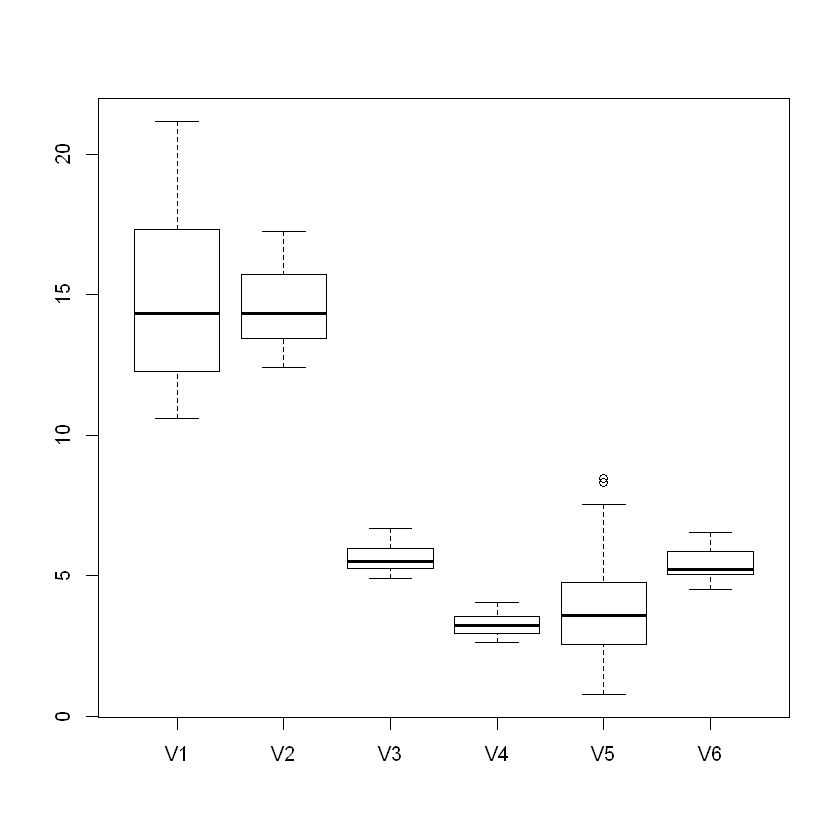

In [2]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//semillas1.txt",dec=".")

print(datos[1:10,])
summary(datos)
boxplot(datos)

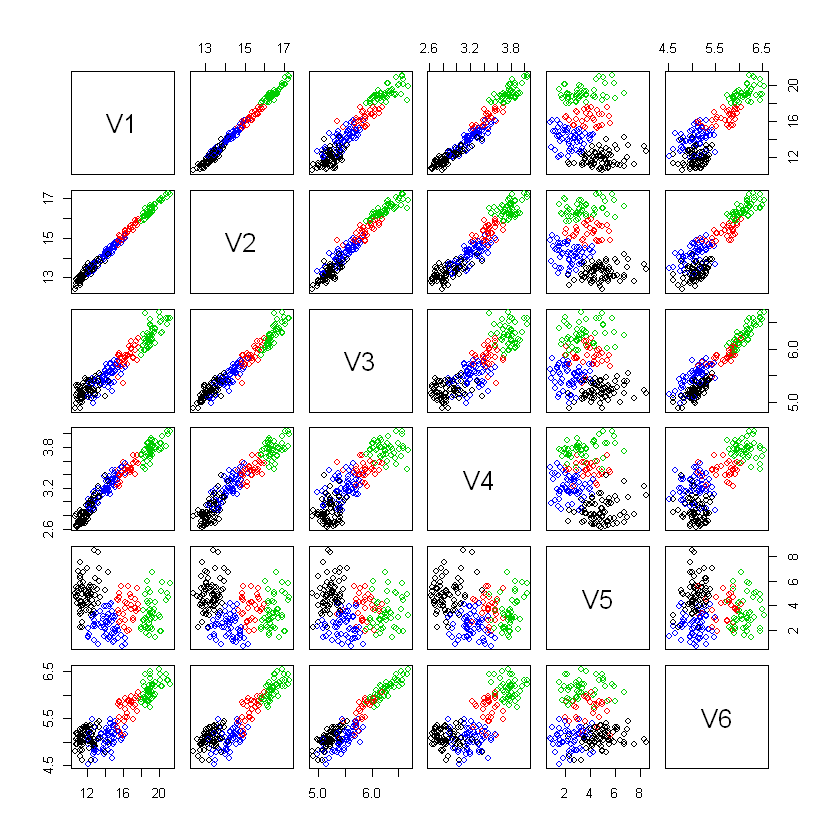

In [6]:
#ingresar valor de k0 
k0=4
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

Al considerar 2,3 o 4 grupos con el algoritmo KMeans, se obtienen grupos bastante bien diferenciados por las variables area, perimetro longitud de las semillas. Las tres últimas variables tienen valores con mayor nivel de confusión entre los grupos definidos por kmeans.

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6 
2.16788117 1.00229308 0.49446476 0.20713724 0.08426551 0.03461094 

 6  variables and  210 observations.


Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6
-2.1449502,-0.6115826,-0.11654550,-0.03565510,0.002483217,0.007844728
1.2209796,-0.2371274,0.02424665,-0.03216181,0.006992513,-0.034944879
3.2304234,-0.2116132,-0.04972335,-0.04857660,0.008226285,0.018955948
-0.6521064,1.0430904,0.16993814,0.09992983,-0.013396969,-0.006634148


K-means clustering with 4 clusters of sizes 72, 31, 48, 59

Cluster means:
        V1       V2       V3       V4       V5       V6
1 11.91861 13.25681 5.225625 2.865319 4.885500 5.087472
2 16.40806 15.31935 5.863968 3.463323 3.850097 5.690452
3 19.15104 16.46917 6.268854 3.772938 3.460417 6.127250
4 14.10068 14.19559 5.475576 3.212542 2.370051 5.065847

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   3   2   1   4   4   2   4   3   4   1   4   2   2   3   1   1   2   2   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   3   4   1   1   2   1   4   4   3   4   4   1   4   2   3   3   1   4   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   1   3   4   1   3   3   1   1   1   3   1   2   1   4   4   2   4   3   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  4   3   1   2   3   4   3   2   2   1   3   4   2   3   

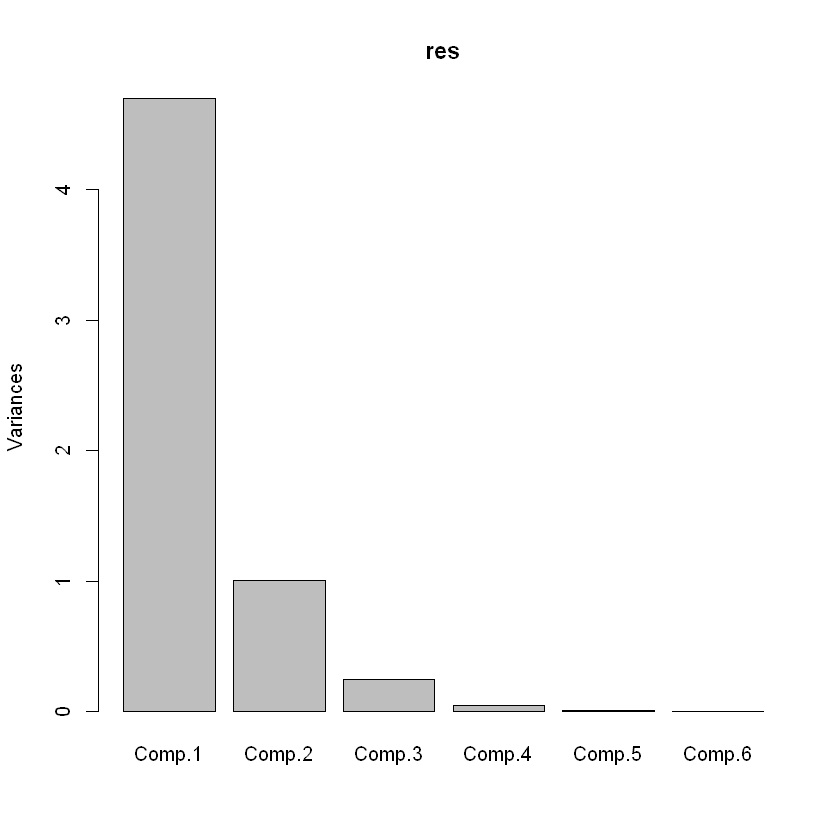

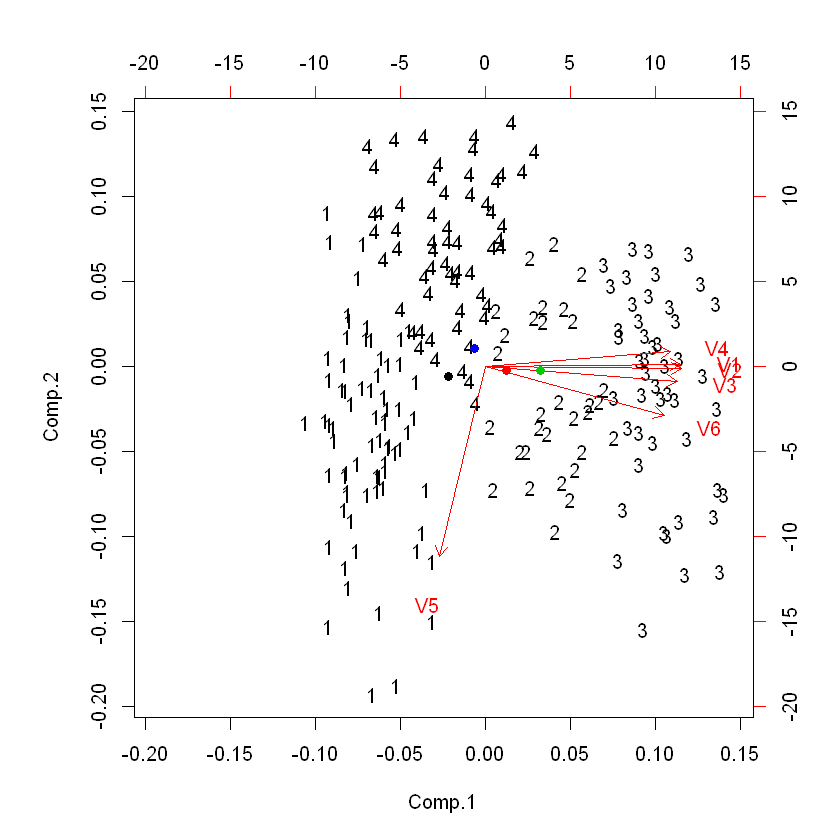

In [7]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


La representación de los grupos en el primer plano principal nos permite distinguir que el grupo 2 representa a las semillas con mayores valores de todas las variables excepto V5, el coeficiente de simetría. El grupo 1 representa las semillas con valores intermendios de las distintas variables  y los grupos 3 y 4 con los menores valores. Se distinguen el grupo 3 del 4 por sus mayores valores de V5 el coeficiente de simetría. 


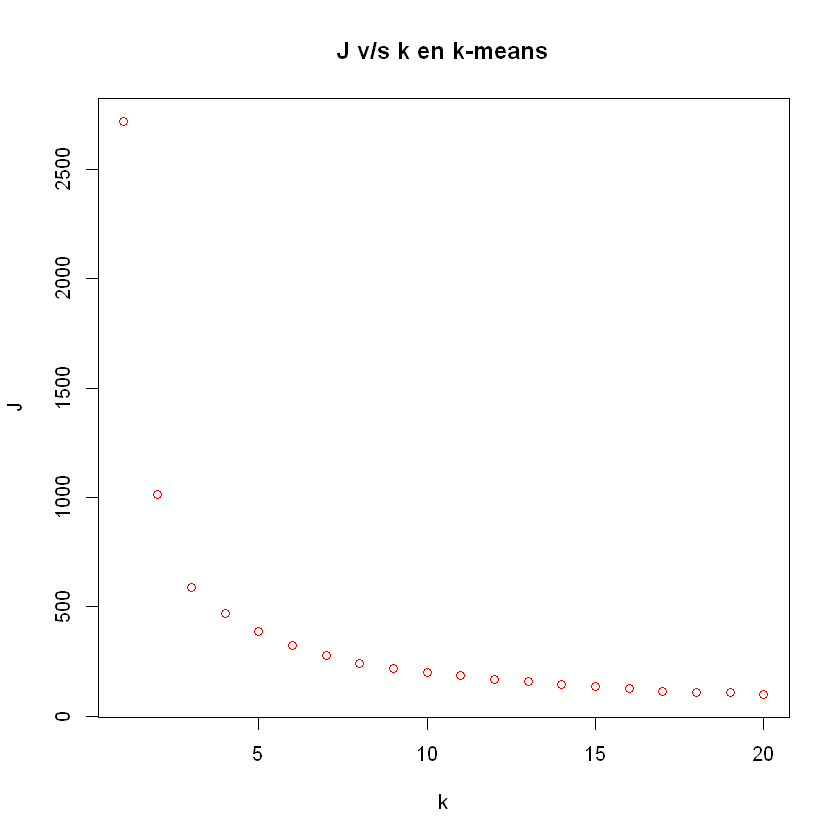

In [8]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

### Ejercicio 1:

1. De acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado? Explique su decisión.
2. Realice nuevamente los cálculos con el K óptimo y  caracterice los grupos obtenidos. Interprete sus resultados

### Respuesta 1
1.1 De acuerdo a la heurística vista en clases, el codo en el gráfico se encuentra en k=3. 

1.2 El agrupamiento considerando 3 grupos es mucho mas preciso que el realizado con 4 grupos como se puede observar al comparar las proyecciones de los datos en el primer plano principal, que representa el 95% de la variabilidad de los datos. En este caso disminuye mucho la zona de intersección entre los grupos. 
De acuerdo a los gráficos de mas abajo, en el primer eje principal, se ubica mas a la izquierda el Grupo 1, luego el Grupo 3 y finalmente el Grupo 2. El biplot nos indica que las observaciones a la izquierda son aquellas con mayores valores de las variables V1, V2, V3, V4 y V6. Por otra parte, considerando el segundo eje principal, que está asociado con la variable V5, coeficiente de asimetría, se observa que el Grupo 2 presenta mayores valores del coeficiente de asimetría que aquellas semillas incluídas en el Grupo 3.
De esta manera, en el Grupo 1 se ubican las semillas con mayores valores de todas las variables a excepción de V5. En el Grupo 3 se agrupan las semillas con valores intermedios de las variables V1, V2, V3, V4 y V6 y menores valores de V5 y por último en el Grupo 2 se encuentran las semillas con menores valores de todas las variables a excepción de V5.

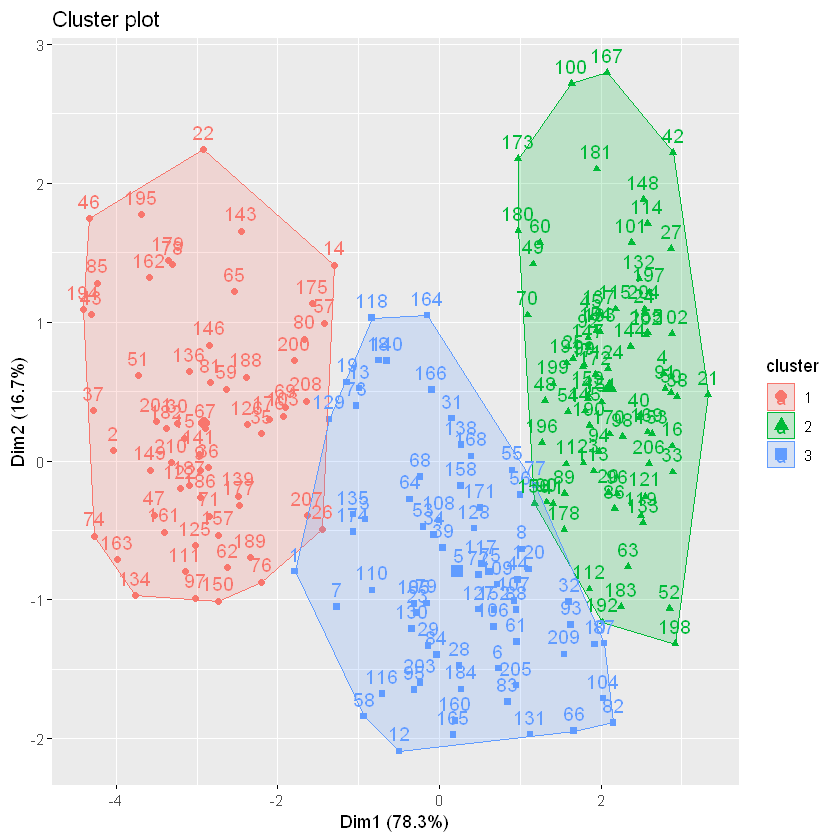

In [13]:
df <- data.frame(datos)
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
fviz_cluster(cl, df)

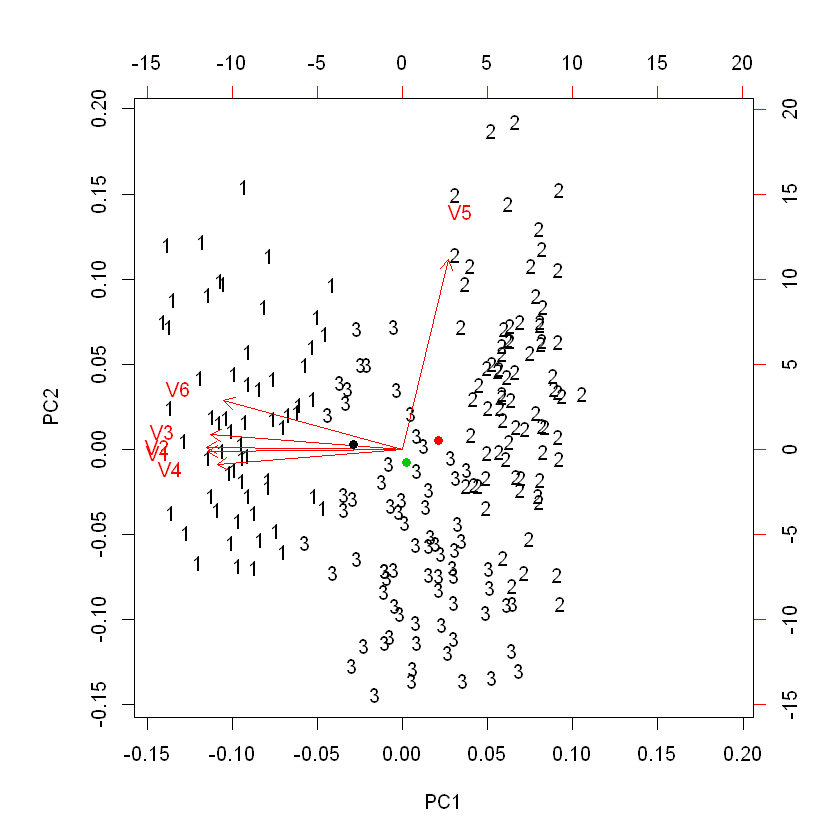

In [14]:
res <- prcomp(datos,scale=TRUE)
res2 <- predict(res,cl$centers)
biplot(res,xlabs=cl$cluster)
points(res2[,1:2],col=1:k0,pch=19)

## Otras alternativas de cálculo

Warning message:
"package 'factoextra' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


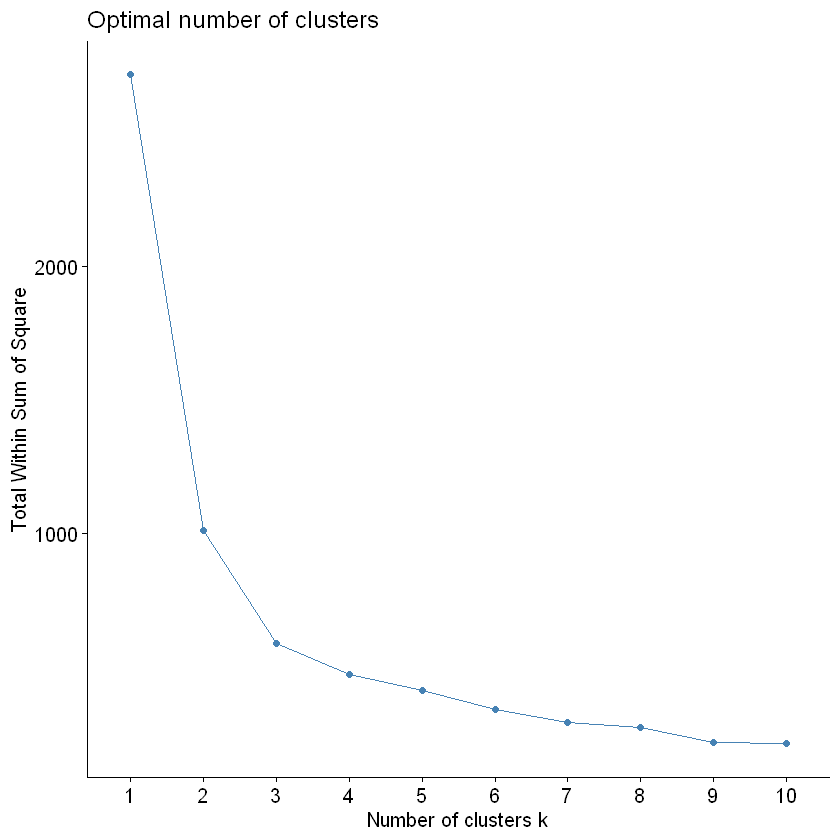

In [5]:
library(cluster)
library(factoextra)
df <- data.frame(datos)
fviz_nbclust(df, kmeans, method = "wss")


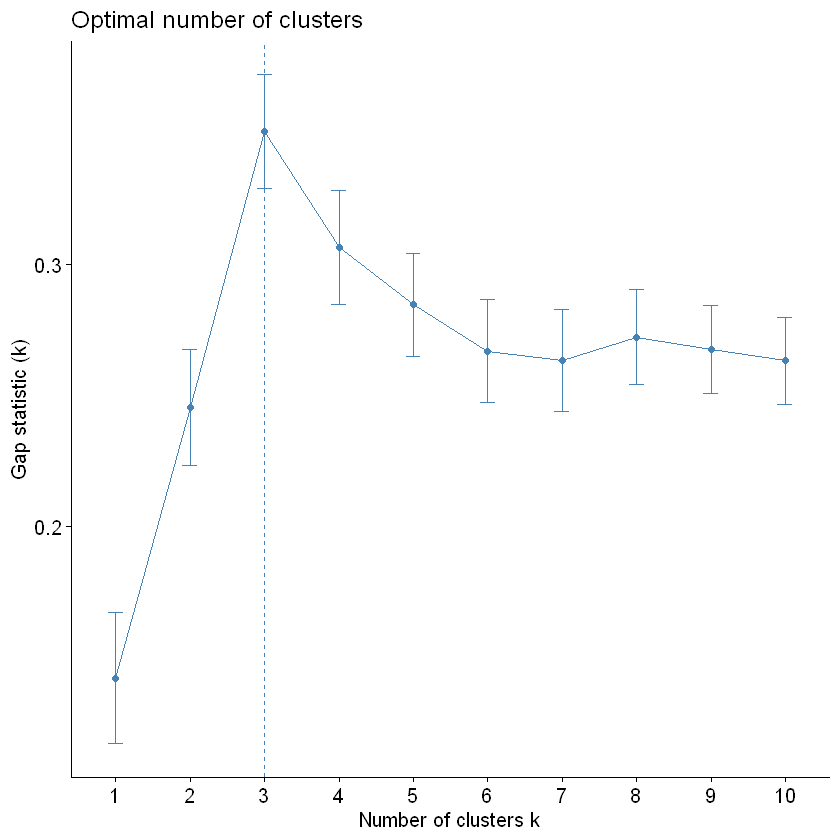

In [6]:
#calculo de gap estadístico basado en el número de grupos: 
#tasa entre la suma de distancias intragrupos con k grupos y con un sólo un grupo
gap_stat <- clusGap(df,
                    FUN = kmeans,
                    nstart = 25,
                    K.max = 10,
                    B = 50)


fviz_gap_stat(gap_stat)

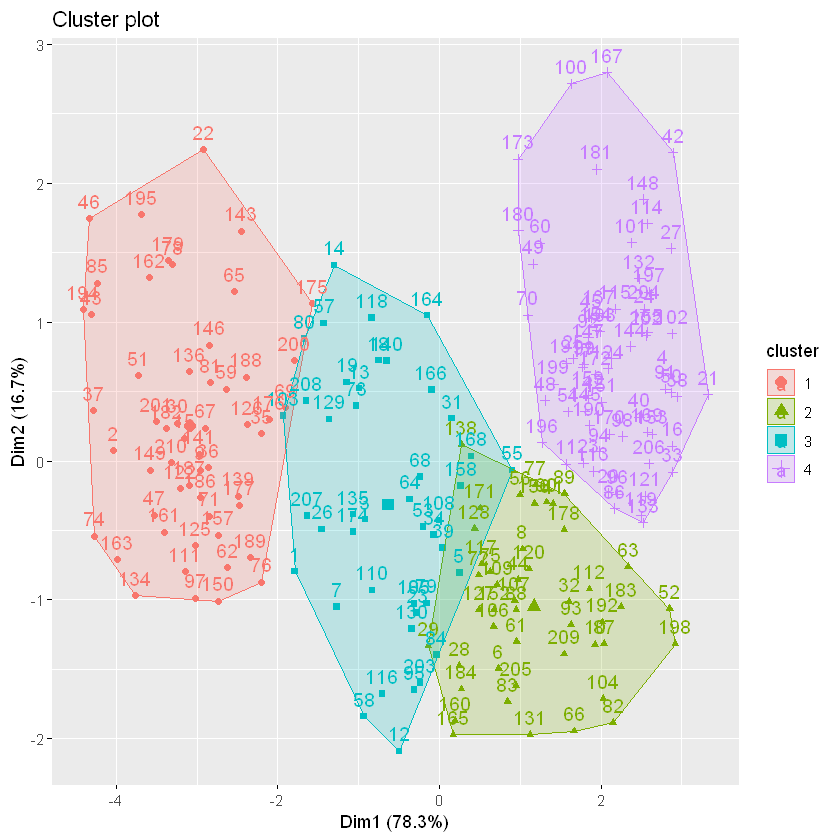

In [54]:
fviz_cluster(cl, df)

### Ejercicio 2:
Realice un análisis de clustering con las 11 características (correspondiente a las columnas 4 a la 14)  en el archivo tiposMusica.csv. Si es necesario, filtre sus datos considerando las conclusiones del análisis exploratorio de la tarea de PCA.

1. Describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento
2. Utilice k-means para realizar el clustering de los datos y calcule el K óptimo. 
3. Caracterice los grupos obtenidos con el K óptimo. Interprete sus resultados


In [17]:
datosC <- read.csv("..//data//tiposMusica.csv",header=TRUE,sep=";",dec=".")

In [18]:
datosC[1:10,4:14]

popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
14,0.942,0.350,79333,0.0761,0.00e+00,0.1560,-22.003,0.0352,140.044,0.0293
13,0.991,0.236,261000,0.0753,3.15e-03,0.0858,-23.232,0.0426,122.973,0.3000
2,0.994,0.240,48000,0.2510,9.58e-01,0.1020,-11.310,0.0394,99.234,0.1600
32,0.996,0.387,136293,0.0222,9.22e-01,0.1200,-29.504,0.1400,112.360,0.0687
29,0.994,0.358,154147,0.2050,1.45e-05,0.1490,-13.588,0.0430,87.696,0.5180
25,0.993,0.470,70987,0.2040,9.15e-01,0.1180,-21.667,0.0653,138.257,0.0398
0,0.644,0.415,64760,0.0197,0.00e+00,0.1970,-34.225,0.0369,74.338,0.2280
0,0.993,0.380,297372,0.0414,9.23e-01,0.1130,-22.443,0.0350,75.241,0.5470
23,0.993,0.332,219947,0.2300,8.72e-01,0.1110,-23.125,0.0620,99.962,0.0356
17,0.982,0.173,86401,0.1020,3.49e-02,0.1460,-24.937,0.0387,86.998,0.3350


### Respuesta 2.1
De acuerdo a lo realizado en la tarea anterior, los datos consideran 11 variables de características de las canciones que debieran permitir discriminar a que género corresponden. De acuerdo al resumen estadístico y los gráficos de caja, las variables "duration_s" y "tempo" son las que tiene la mayor dispersión y la variable "speechiness" la menor varianza. En cuanto a las correlaciones, la mayor correlación positiva se presenta entre "loudness" y "energy" y las mayores correlaciones negativas entre las variables "loudness" y "energy" con "acousticness". También se aprecia una correlación negativa entre "instrumentalness" y "loudness". Del PCA se puede inferir la existencia de grupos, por lo que un análisis de agrupamiento parece útil. En particular como sabemos que se trata de 3 géneros distintos de canción, vamos a considerar un agrupamiento con K=3 grupos. 



### Respuesta 2.2 y 2.3
De acuerdo a los análisis expuestos mas abajo y en coincidencia con el argumento de los propios datos (género), el número de grupos mas adecuado es K=3. Con este número de grupos, kmeans genera 3 grupos en que se distingue un grupo con pocos representantes (2) que se distingue por altos valores de "duration_ms", luego se observa dos grupos con algún nivel de interseccion, en que el grupo 1 presenta valores medios de todos las variables  a excepcepión de "liveness" y el grupo 3, en que la mayor parte de las observaciones tienen altos valores de "speechiness".

In [19]:
library(cluster)
library(factoextra)
df2 <- data.frame(datosC[,4:14])

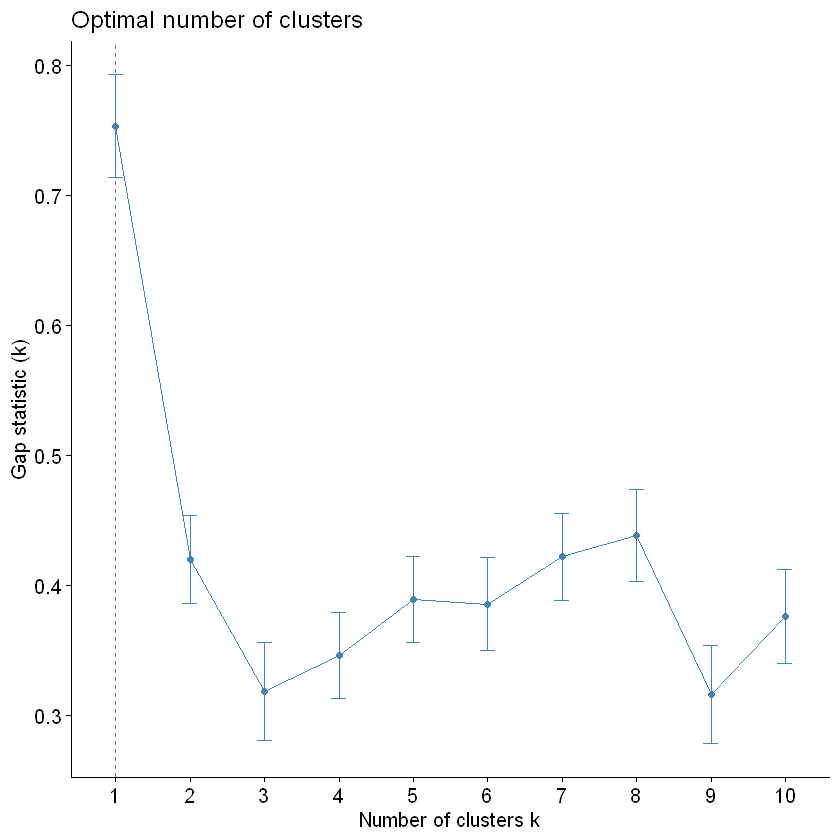

In [20]:
gap_stat <- clusGap(df2,
                    FUN = kmeans,
                    nstart = 25,
                    K.max = 10,
                    B = 50)


fviz_gap_stat(gap_stat)

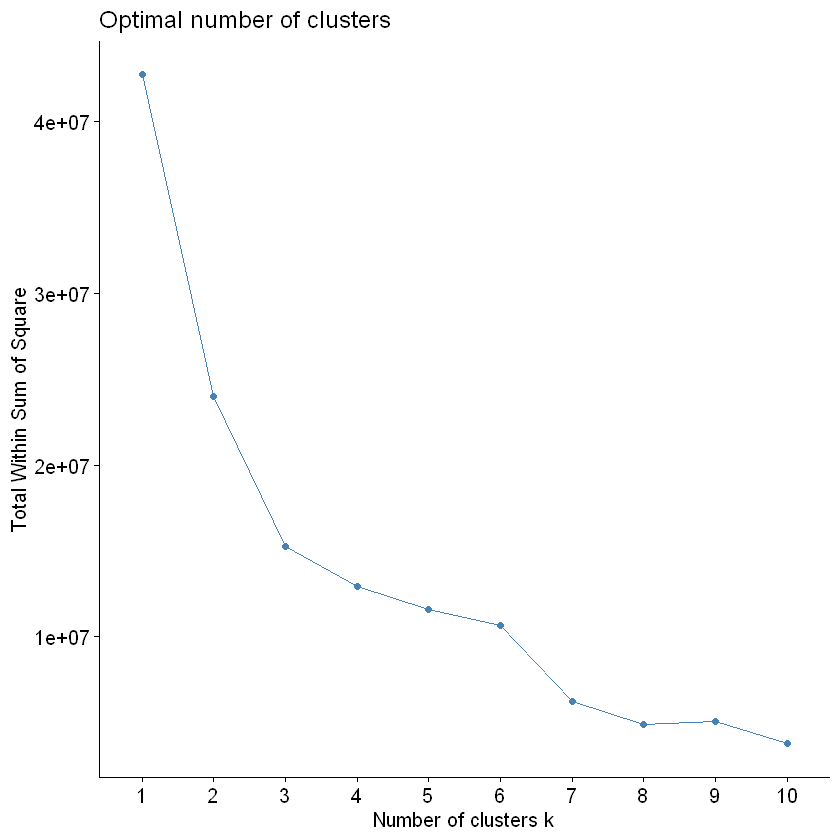

In [36]:
library(cluster)
library(factoextra)
fviz_nbclust(df2, kmeans, method = "wss")


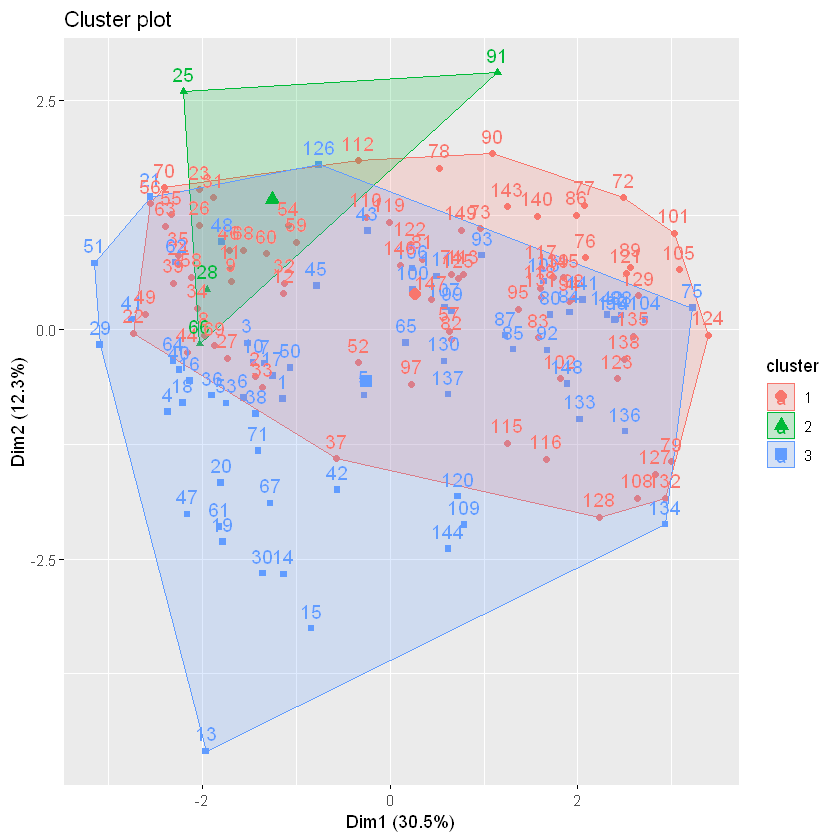

In [21]:

k0=3
cl<-kmeans(datosC[,4:14],k0,iter.max=1000,nstart=10)
fviz_cluster(cl, df2)

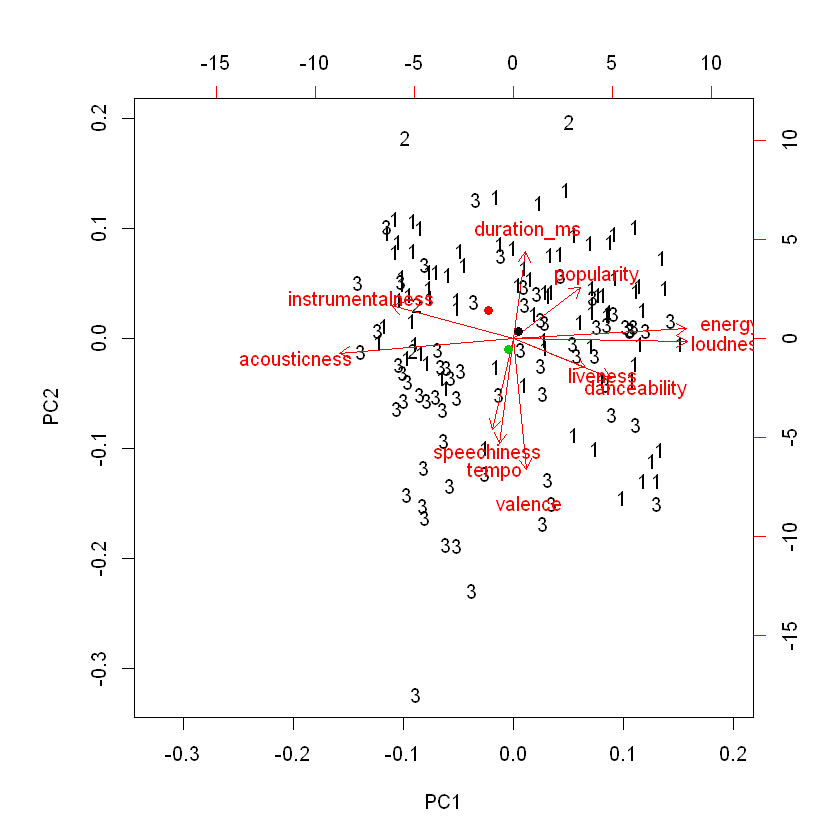

In [22]:
res <- prcomp(datosC[,4:14],scale=TRUE)
res2 <- predict(res,cl$centers)
biplot(res,xlabs=cl$cluster)
points(res2[,1:2],col=1:k0,pch=19)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
Min.,0.0000,0.0003830,0.068500,198320.0,0.0032500,0.0000000,0.0548000,-39.29500,0.02610000,65.09000,0.000000
1st Qu.,36.0000,0.0565250,0.276000,222994.8,0.0985250,0.0018300,0.0949000,-22.64350,0.03520000,79.97125,0.065150
Median,45.5000,0.7105000,0.376000,257353.0,0.3360000,0.2555000,0.1120000,-12.69600,0.04480000,87.91200,0.209500
Mean,42.3625,0.5724581,0.403315,274685.9,0.3645029,0.4058571,0.1838475,-15.67374,0.04720125,96.80460,0.263605
3rd Qu.,54.0000,0.9702500,0.526000,311791.8,0.5760000,0.8305000,0.1717500,-8.24450,0.05122500,109.63800,0.386250
Max.,74.0000,0.9960000,0.865000,466000.0,0.9770000,0.9530000,0.9720000,-0.74700,0.15200000,177.74400,0.954000


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
Min.,5.00,0.45700,0.07400,540160,0.01140,0.62700,0.08490,-32.86600,0.03770,71.60600,0.037300
1st Qu.,26.75,0.74350,0.10775,629290,0.04455,0.78450,0.09255,-25.64275,0.04160,80.11625,0.103825
Median,38.00,0.87450,0.13650,740820,0.09880,0.86000,0.10855,-21.81100,0.07545,89.77900,0.201000
Mean,33.50,0.78625,0.26400,721935,0.22400,0.81575,0.10825,-22.25375,0.09065,103.59575,0.207325
3rd Qu.,44.75,0.91725,0.29275,833465,0.27825,0.89125,0.12425,-18.42200,0.12450,113.25850,0.304500
Max.,53.00,0.93900,0.70900,865940,0.68700,0.91600,0.13100,-12.52700,0.17400,163.21900,0.390000


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
Min.,0.00000,0.0000510,0.1520000,31787.0,0.0021100,0.0000000,0.0504000,-46.12200,0.02780000,67.6920,0.0293000
1st Qu.,26.00000,0.2080000,0.2610000,70987.0,0.0581000,0.0033900,0.1030000,-26.16400,0.03730000,83.2700,0.0547000
Median,35.00000,0.9320000,0.3870000,132838.0,0.2280000,0.5350000,0.1200000,-15.63600,0.04510000,112.1840,0.1720000
Mean,34.81538,0.6448506,0.3872154,120044.4,0.3429109,0.4825898,0.1771431,-18.61714,0.05913077,110.4832,0.2835538
3rd Qu.,51.00000,0.9850000,0.4920000,167027.0,0.6140000,0.9060000,0.1570000,-10.11900,0.05560000,132.5680,0.4050000
Max.,70.00000,0.9960000,0.7780000,195141.0,0.9680000,0.9580000,0.7970000,-3.08600,0.27000000,179.8950,0.9060000


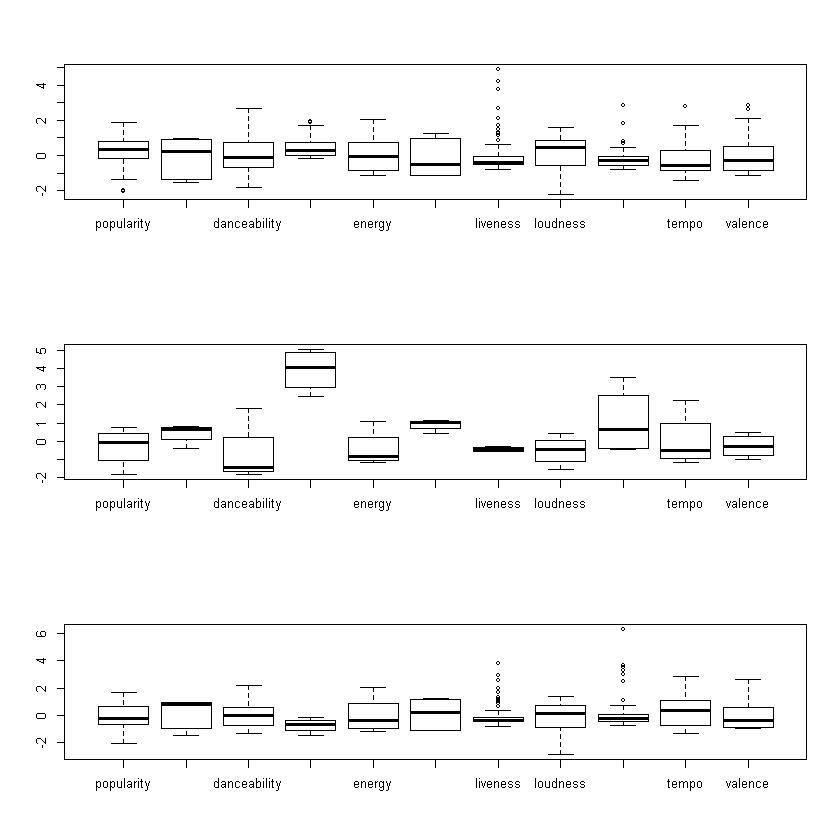

In [32]:

datosS <- scale(datosC[,4:14])
apply(datosC[cl$cluster==1,4:14],2,summary)
apply(datosC[cl$cluster==2,4:14],2,summary)
apply(datosC[cl$cluster==3,4:14],2,summary)
par(mfrow=c(3,1))
boxplot(datosS[cl$cluster==1,])
boxplot(datosS[cl$cluster==2,])
boxplot(datosS[cl$cluster==3,])

